<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1.-[Chapter-07]-군집화" data-toc-modified-id="1.-[Chapter-07]-군집화-1">1. [Chapter 07] 군집화</a></span><ul class="toc-item"><li><span><a href="#1.1-K-평균-알고리즘-이해" data-toc-modified-id="1.1-K-평균-알고리즘-이해-1.1">1.1 K-평균 알고리즘 이해</a></span><ul class="toc-item"><li><span><a href="#1.1.1-사이킷런-KMeans-클래스-소개" data-toc-modified-id="1.1.1-사이킷런-KMeans-클래스-소개-1.1.1">1.1.1 사이킷런 KMeans 클래스 소개</a></span></li><li><span><a href="#1.1.2-K-평균을-이용한-붓꽃-데이터-세트-군집화" data-toc-modified-id="1.1.2-K-평균을-이용한-붓꽃-데이터-세트-군집화-1.1.2">1.1.2 K-평균을 이용한 붓꽃 데이터 세트 군집화</a></span></li><li><span><a href="#1.1.3-군집화-알고리즘-테스트를-위한-데이터-생성" data-toc-modified-id="1.1.3-군집화-알고리즘-테스트를-위한-데이터-생성-1.1.3">1.1.3 군집화 알고리즘 테스트를 위한 데이터 생성</a></span></li></ul></li><li><span><a href="#1.2-군집-평가" data-toc-modified-id="1.2-군집-평가-1.2">1.2 군집 평가</a></span><ul class="toc-item"><li><span><a href="#1.2.1-실루엣-분석의-개요" data-toc-modified-id="1.2.1-실루엣-분석의-개요-1.2.1">1.2.1 실루엣 분석의 개요</a></span></li><li><span><a href="#1.2.2-붓꽃-데이터-세트를-이용한-군집-평가" data-toc-modified-id="1.2.2-붓꽃-데이터-세트를-이용한-군집-평가-1.2.2">1.2.2 붓꽃 데이터 세트를 이용한 군집 평가</a></span></li><li><span><a href="#1.2.3-군집별-평균-실루엣-계수의-시각화를-통한-군집-개수-최적화-방법" data-toc-modified-id="1.2.3-군집별-평균-실루엣-계수의-시각화를-통한-군집-개수-최적화-방법-1.2.3">1.2.3 군집별 평균 실루엣 계수의 시각화를 통한 군집 개수 최적화 방법</a></span></li></ul></li><li><span><a href="#1.3-평균-이동" data-toc-modified-id="1.3-평균-이동-1.3">1.3 평균 이동</a></span></li><li><span><a href="#1.4-GMM(Gaussian-Mixture-Model)" data-toc-modified-id="1.4-GMM(Gaussian-Mixture-Model)-1.4">1.4 GMM(Gaussian Mixture Model)</a></span><ul class="toc-item"><li><span><a href="#1.4.1-GMM을-이용한-붓꽃-데이터-세트-군집화" data-toc-modified-id="1.4.1-GMM을-이용한-붓꽃-데이터-세트-군집화-1.4.1">1.4.1 GMM을 이용한 붓꽃 데이터 세트 군집화</a></span></li><li><span><a href="#1.4.2-GMM과-K-평균의-비교" data-toc-modified-id="1.4.2-GMM과-K-평균의-비교-1.4.2">1.4.2 GMM과 K-평균의 비교</a></span></li></ul></li><li><span><a href="#1.5-DBSCAN" data-toc-modified-id="1.5-DBSCAN-1.5">1.5 DBSCAN</a></span><ul class="toc-item"><li><span><a href="#1.5.1-DBSCAN-적용하기---붓꽃-데이터-세트" data-toc-modified-id="1.5.1-DBSCAN-적용하기---붓꽃-데이터-세트-1.5.1">1.5.1 DBSCAN 적용하기 - 붓꽃 데이터 세트</a></span></li><li><span><a href="#1.5.2-DBSCAN-적용하기---make_circles()-데이터-세트" data-toc-modified-id="1.5.2-DBSCAN-적용하기---make_circles()-데이터-세트-1.5.2">1.5.2 DBSCAN 적용하기 - make_circles() 데이터 세트</a></span></li></ul></li><li><span><a href="#1.6-군집화-실습---고객-세그먼테이션" data-toc-modified-id="1.6-군집화-실습---고객-세그먼테이션-1.6">1.6 군집화 실습 - 고객 세그먼테이션</a></span><ul class="toc-item"><li><span><a href="#1.6.1-RFM-기반-데이터-가공" data-toc-modified-id="1.6.1-RFM-기반-데이터-가공-1.6.1">1.6.1 RFM 기반 데이터 가공</a></span></li><li><span><a href="#1.6.2--RFM-기반-고객-세그먼테이션" data-toc-modified-id="1.6.2--RFM-기반-고객-세그먼테이션-1.6.2">1.6.2  RFM 기반 고객 세그먼테이션</a></span></li></ul></li></ul></li></ul></div>

# 1. [Chapter 07] 군집화

## 1.1 K-평균 알고리즘 이해

- **K-평균 : 군집 중심점이라는 특정한 임의의 지점에 가장 가까운 포인트들을 선택하는 군집화 기법**

군집 중심점을 선택된 포인트의 평균 지점으로 이동하고, 이동된 중심점에서 다시 가까운 포인트를 선택하는 과정을 반복적으로 수행

장점 : 알고리즘이 쉽고 간결하여 일반적인 군집화에서 가장 많이 활용

단점 : 거리 기반 알고리즘으로 속성의 개수가 많을 경우 정확도가 떨어지며, 반복 횟수가 많을 경우 수행 시간이 느림

### 1.1.1 사이킷런 KMeans 클래스 소개

- 파라미터

    n_clusters : 군집 중심점의 개수

    init : 초기에 군집 중심점의 좌표를 설정할 방식 (보통 k-means++ 방식으로 설정)

    max_iter : 최대 반복 횟수
    
    
- 속성

    labels_ : 각 데이터 포인트가 속한 군집 중심점 레이블
    
    cluster_centers : 각 군집 중심점 좌표

### 1.1.2 K-평균을 이용한 붓꽃 데이터 세트 군집화

In [18]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=['sepal_length','sepal_width','petal_length','petal_width'])
df.head(3)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [19]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0)
kmeans.fit(df)

KMeans(n_clusters=3, random_state=0)

In [20]:
print(kmeans.labels_)     # 각 데이터가 어떤 중심에 속하는지 알 수 있음

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


In [21]:
df['target'] = iris.target
df['cluster'] = kmeans.labels_
iris_result = df.groupby(['target','cluster'])['sepal_length'].count()
print(iris_result)

target  cluster
0       1          50
1       0           2
        2          48
2       0          36
        2          14
Name: sepal_length, dtype: int64


Target이 0인 데이터는 1번 군집으로, 1인 데이터는 2개만 0번 군집이고 나머지 48개는 2번 군집으로 그루핑되었으나

Target이 2인 데이터는 0번 군집과 2번 군집에 분산되어 그루핑됨

In [24]:
from sklearn.decomposition import PCA

# 2차원 평면상에서 시각화하기 위해 4개의 속성을 2개로 차원 축소
pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(iris.data)

df['pca_x'] = pca_transformed[:,0]
df['pca_y'] = pca_transformed[:,1]
df.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target,cluster,pca_x,pca_y
0,5.1,3.5,1.4,0.2,0,1,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,1,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,1,-2.888991,-0.144949


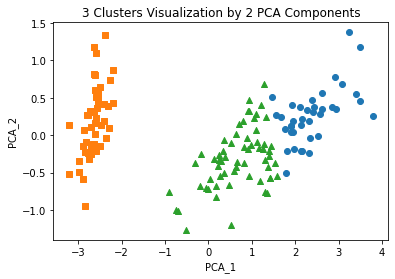

In [25]:
marker0 = df[df['cluster'] == 0].index
marker1 = df[df['cluster'] == 1].index
marker2 = df[df['cluster'] == 2].index

plt.scatter(x=df.loc[marker0, 'pca_x'], y=df.loc[marker0, 'pca_y'], marker='o')
plt.scatter(x=df.loc[marker1, 'pca_x'], y=df.loc[marker1, 'pca_y'], marker='s')
plt.scatter(x=df.loc[marker2, 'pca_x'], y=df.loc[marker2, 'pca_y'], marker='^')

plt.xlabel('PCA_1')
plt.ylabel('PCA_2')
plt.title('3 Clusters Visualization by 2 PCA Components')
plt.show()

1번 군집은 명확히 분리되어 있으며, 0번 군집과 2번 군집도 상당 수준 분리돼 있지만 1번만큼은 아님

### 1.1.3 군집화 알고리즘 테스트를 위한 데이터 생성

- **make_blobs()**는 개별 군집의 중심점과 표준 편차 제어 기능이 있음

    n_samples : 생성할 총 데이터의 개수 (디폴트 100)
    
    n_features : 데이터의 피처 개수
    
    centers : int 값으로 설정하면 군집의 개수, ndarray 형태로 표현하면 개별 군집 중심점의 좌표
    
    cluster_std : 생성될 군집 데이터의 표준 편차 (군집별로 서로 다른 표준 편차를 가진 데이터 세트를 만들 때 리스트 형태로 표현)


- **make_classification()**은 노이즈를 포함한 데이터를 만드는 데 유용하게 사용

** 두 API 모두 대표적인 군집화용 데이터 생성기로, 분류 용도로도 테스트 데이터 생성이 가능

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
%matplotlib inline

X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.8, random_state=0)
print(X.shape, y.shape)

# y target 값의 분포를 확인
unique, counts = np.unique(y, return_counts=True)
print(unique, counts)

(200, 2) (200,)
[0 1 2] [67 67 66]


200개의 레코드와 2개의 피처를 가지고 있으며, cluster 값 [0,1,2]은 각각 균일하게 구성되어 있음

In [27]:
import pandas as pd

df = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
df['target'] = y
df.head(3)

,ftr1,ftr2,target
0,-1.692427,3.622025,2
1,0.697940,4.428867,0
2,1.100228,4.606317,0


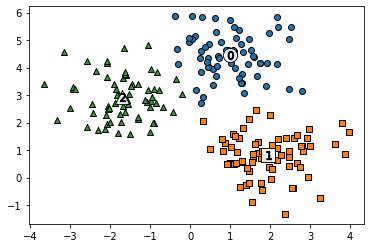

In [28]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=200, random_state=0)
cluster_labels = kmeans.fit_predict(X)
df['kmeans_label'] = cluster_labels

centers = kmeans.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers = ['o','s','^','P','D','H','x']

# 군집된 label 유형별로 iteration 하면서 시각화
for label in unique_labels:
    label_cluster = df[df['kmeans_label'] == label]
    center_xy = centers[label]
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k', marker=markers[label])
    
    plt.scatter(x=center_xy[0], y=center_xy[1], s=200, color='white', alpha=0.9, edgecolor='k', marker=markers[label])
    plt.scatter(x=center_xy[0], y=center_xy[1], s=70, color='k', edgecolor='k', marker='$%d$' % label)
plt.show()

make_blobs()의 target과 kmeans_label은 군집 번호를 의미하므로 서로 다른 값으로 매핑될 수 있음

In [29]:
print(df.groupby('target')['kmeans_label'].value_counts())

target  kmeans_label
0       0               66
        2                1
1       1               67
2       2               65
        1                1
Name: kmeans_label, dtype: int64


## 1.2 군집 평가

대부분의 군집화 데이터 세트는 Target 레이블이 없으며, 비지도학습 특성상 정확한 성능을 평가하기 어려움

### 1.2.1 실루엣 분석의 개요

- **실루엣 분석 : 각 군집 간의 거리가 얼마나 효율적으로 분리돼 있는지를 나타냄**

    **sklearn.metrics.silhouette_samples**(X, labels, metric='euclidean', **kwds) : 각 데이터 포인트의 실루엣 계수를 계산해 반환
    
    **sklearn.metrics.silhouette_score**(X, labels, metric='euclidean', sample_size=None, **kwds) : 전체 데이터의 실루엣 계수 값을 평균해 반환
    
    
- 좋은 군집화의 기준 조건

    1) 전체 실루엣 계수의 평균값(사이킷런의 silhouette_score())은 0~1 사이의 값을 가지며, 1에 가까울수록 좋음
    
    2) 개별 군집의 평균값의 편차가 크지 않아야 함
    
cf) 실루엣 계수 : 개별 데이터가 가지는 군집화 지표. 같은 군집 내 데이터와 얼마나 가까운지, 다른 군집 데이터와 얼마나 멀리 있는지를 나타냄

### 1.2.2 붓꽃 데이터 세트를 이용한 군집 평가

In [31]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
feature_names = ['sepal_length','sepal_width','petal_length','petal_width']
df = pd.DataFrame(data=iris.data, columns=feature_names)
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0).fit(df)
df['cluster'] = kmeans.labels_

# iris의 모든 개별 데이터에 실루엣 계수 값을 구함
score_samples = silhouette_samples(iris.data, df['cluster'])
print('silhouette_samples() return 값의 shape', score_samples.shape)

# df에 실루엣 계수 칼럼 추가
df['silhouette_coeff'] = score_samples

# 모든 데이터의 평균 실루엣 계수 값을 구함
average_score = silhouette_score(iris.data, df['cluster'])
print('붓꽃 데이터 세트 Silhouette Analysis Score: {0:.3f}'.format(average_score))
df.head(3)

silhouette_samples() return 값의 shape (150,)
붓꽃 데이터 세트 Silhouette Analysis Score: 0.553


,sepal_length,sepal_width,petal_length,petal_width,cluster,silhouette_coeff
0,5.1,3.5,1.4,0.2,1,0.852955
1,4.9,3.0,1.4,0.2,1,0.815495
2,4.7,3.2,1.3,0.2,1,0.829315


In [32]:
df.groupby('cluster')['silhouette_coeff'].mean()

cluster
0    0.451105
1    0.798140
2    0.417320
Name: silhouette_coeff, dtype: float64

1번 군집의 실루엣 계수 값이 약 0.79인데 반해, 다른 군집의 실루엣 계수 값이 낮아 전체 평균 실루엣 계수 값이 약 0.553으로 나타남

### 1.2.3 군집별 평균 실루엣 계수의 시각화를 통한 군집 개수 최적화 방법

http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

https://github.com/wikibook/ml-definitive-guide/blob/master/7%EC%9E%A5/7-2_Cluster%20evaluation.ipynb

In [15]:
def visualize_silhouette(cluster_lists, X_features): 

    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math
    
    # 입력값으로 클러스터링 갯수들을 리스트로 받아 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링을 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

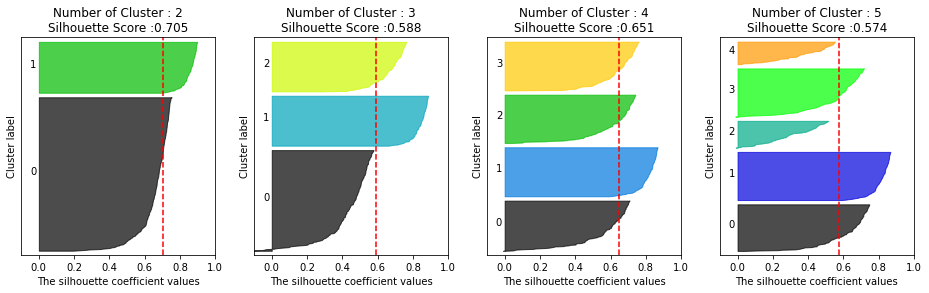

In [35]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=500, n_features=2, centers=4, cluster_std=1, center_box=(-10, 10), shuffle=True, random_state=1)

# 군집 개수가 2, 3, 4, 5개일 때의 군집별 실루엣 계수 평균값 시각화
visualize_silhouette([2,3,4,5], X)

군집이 2개인 경우보다 평균 실루엣 계수 값이 작지만, 4개인 경우 개별 군집의 평균 실루엣 계수 값이 비교적 균일하여 가장 이상적임

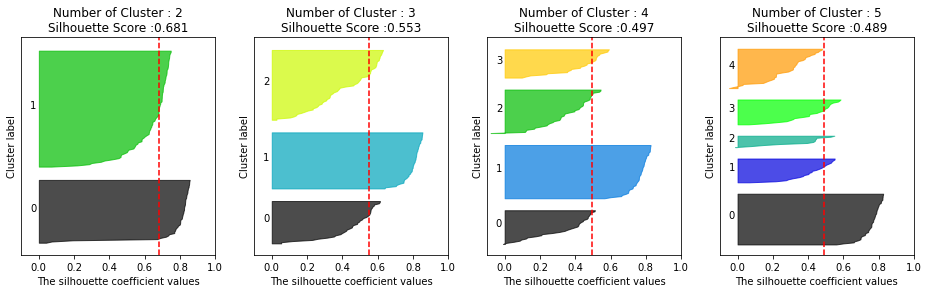

In [36]:
from sklearn.datasets import load_iris
iris = load_iris()
visualize_silhouette([2,3,4,5], iris.data)

붓꽃 데이터의 경우에는 군집 개수를 2개로 하는 것이 가장 이상적임

실루엣 계수를 통한 K-평균 군집 평가 방법은 직관적으로 이해하기 쉽지만, 데이터 양이 늘어나면 수행 시간이 크게 늘어나는 단점이 있음

메모리 부족 등의 에러가 발생할 경우 군집별로 임의의 데이터를 샘플링해 실루엣 계수를 평가하는 방안을 고민해야 함

## 1.3 평균 이동

- **평균 이동 : K-평균과 유사하지만 데이터의 분포도를 이용해 군집 중심점을 찾는다는 점에서 차이가 있음**. 이미지, 영상에서 뛰어난 역할 수행

장점 : 데이터 세트를 특정 형태로 가정하기 않기 때문에 좀 더 유연하며, 이상치의 영향력도 크지 않고 군집의 개수를 미리 정할 필요가 없음

단점 : 수행 시간이 오래 걸리고, bandwidth의 크기에 따른 영향이 매우 큼

    1) 개별 데이터의 특정 반경 내 데이터 분포도를 KDE 기반의 알고리즘으로 계산
    
    2) KDE로 계산된 데이터 분포도가 높은 방향으로 데이터 이동
    
    3) 개별 데이터들이 군집 중심점으로 모임
    
    4) 지정된 반복 횟수만큼 군집화를 수행하며, 개별 데이터들이 모인 중심점을 군집 중심점으로 설정
    
cf) KDE : 커널 함수를 통해 어떤 변수의 확률 밀도 함수(PDF,확률 변수의 분포를 나타내는 함수)를 추정하는 방법

**일반적으로 KDE의 대역폭 h가 클수록 평활화되어 적은 수의 군집 중심점(과소적합)을 가지며, h가 적을수록 많은 수의 군집 중심점(과적합)을 가짐**

**estimate_bandwidth()** 함수로 최적화된 대역폭 h의 크기인 bandwidth 값 반환

**MeanShift** 클래스를 이용하여 bandwidth 파라미터에 따라 군집화 수행

In [5]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import MeanShift
from sklearn.cluster import estimate_bandwidth

X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.7, random_state=0)

cluster_df = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
cluster_df['target'] = y

best_bandwidth = estimate_bandwidth(X)

meanshift = MeanShift(bandwidth=best_bandwidth)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형: ', np.unique(cluster_labels))

cluster labels 유형:  [0 1 2]


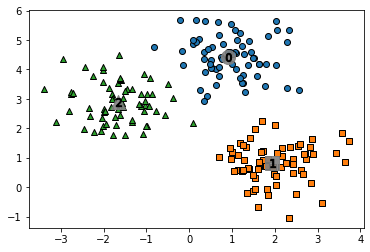

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

cluster_df['meanshift_label'] = cluster_labels
centers = meanshift.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers = ['o','s','^','x','*']

for label in unique_labels:
    label_cluster = cluster_df[cluster_df['meanshift_label'] == label]
    center_xy = centers[label]
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k', marker=markers[label])
    plt.scatter(x=center_xy[0], y=center_xy[1], s=200, color='gray', alpha=0.9, marker=markers[label])
    plt.scatter(x=center_xy[0], y=center_xy[1], s=70, color='k', edgecolor='k', marker='$%d$' % label)
plt.show()

In [7]:
print(cluster_df.groupby('target')['meanshift_label'].value_counts())

target  meanshift_label
0       0                  67
1       1                  67
2       2                  66
Name: meanshift_label, dtype: int64


## 1.4 GMM(Gaussian Mixture Model)

- **GMM : 데이터를 여러 개의 가우시안 분포(정규 분포)가 섞인 것으로 가정하여 군집화를 수행하는 방식**

데이터를 구성하는 여러 개의 정규 분포 곡선을 추출하고, 개별 데이터가 이 중 어떤 정규 분포에 속하는지 결정 (모수 추정)

GMM의 EM 방식을 통한 모수 추정 군집화를 위해 **GaussianMixture** 클래스 사용

n_components 파라미터로 gaussian mixture 모델의 총 개수 지정

### 1.4.1 GMM을 이용한 붓꽃 데이터 세트 군집화

In [9]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
feature_names = ['sepal_length','sepal_width','petal_length','petal_width']

iris_df = pd.DataFrame(data=iris.data, columns=feature_names)
iris_df['target'] = iris.target

In [11]:
gmm = GaussianMixture(n_components=3, random_state=0).fit(iris.data)
gmm_cluster_labels = gmm.predict(iris.data)

iris_df['gmm_cluster'] = gmm_cluster_labels
iris_df['target'] = iris.target

iris_result = iris_df.groupby(['target'])['gmm_cluster'].value_counts()
print(iris_result)

target  gmm_cluster
0       0              50
1       1              45
        2               5
2       2              50
Name: gmm_cluster, dtype: int64


모두 잘 매핑되었으며, Target 1만 cluster 1로 45개, cluster 2로 5개 매핑됨

### 1.4.2 GMM과 K-평균의 비교

KMeans는 거리 기반, GMM은 확률 기반 군집화

KMeans는 데이터 세트가 원형의 범위를 가질수록 효율이 높아지지만, GMM은 다양한 데이터 세트에 유연하게 적용 (but, 수행 시간은 오래 걸림)

## 1.5 DBSCAN

- **DBSCAN : 밀도 기반 군집화. 복잡한 기하학적 분포의 데이터 세트에도 효과적으로 적용 가능**

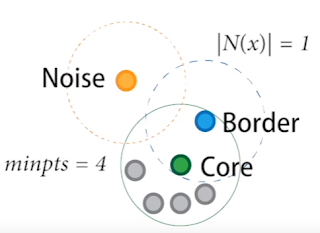

입실론 주변 영역의 최소 데이터 개수를 포함하는 밀도 기준을 충족시키는 데이터인 핵심 포인트를 연결하면서 군집화 구성

**DBSCAN** 클래스를 통해 알고리즘을 지원하며, eps(입실론 주변 반경), min_samples(반경 내 데이터의 최소 개수)를 파라미터로 사용

### 1.5.1 DBSCAN 적용하기 - 붓꽃 데이터 세트

In [1]:
from sklearn.datasets import load_iris
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
feature_names = ['sepal_length','sepal_width','petal_length','petal_width']

iris_df = pd.DataFrame(data=iris.data, columns=feature_names)
iris_df['target'] = iris.target

In [3]:
dbscan = DBSCAN(eps=0.6, min_samples=8, metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)

iris_df['dbscan_cluster'] = dbscan_labels
iris_df['target'] = iris.target

iris_result = iris_df.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)

target  dbscan_cluster
0        0                49
        -1                 1
1        1                46
        -1                 4
2        1                42
        -1                 8
Name: dbscan_cluster, dtype: int64


레이블이 -1인 것은 노이즈에 속하는 군집을 의미하며, 붓꽃 데이터 세트는 0과 1 두 개의 군집으로 군집화됨

DBSCAN은 군집의 개수를 알고리즘에 따라 자동 지정하므로 이를 지정하는 것은 무의미함

클러스터링 결과를 시각화하는 함수 출처 : https://github.com/wikibook/ml-definitive-guide/blob/master/7%EC%9E%A5/7-5_DBSCAN.ipynb

In [4]:
def visualize_cluster_plot(clusterobj, dataframe, label_name, iscenter=True):
    if iscenter :
        centers = clusterobj.cluster_centers_
        
    unique_labels = np.unique(dataframe[label_name].values)
    markers=['o', 's', '^', 'x', '*']
    isNoise=False

    for label in unique_labels:
        label_cluster = dataframe[dataframe[label_name]==label]
        if label == -1:
            cluster_legend = 'Noise'
            isNoise=True
        else :
            cluster_legend = 'Cluster '+str(label)
        
        plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], s=70,\
                    edgecolor='k', marker=markers[label], label=cluster_legend)
        
        if iscenter:
            center_x_y = centers[label]
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=250, color='white',
                        alpha=0.9, edgecolor='k', marker=markers[label])
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',\
                        edgecolor='k', marker='$%d$' % label)
    if isNoise:
        legend_loc='upper center'
    else: legend_loc='upper right'
    
    plt.legend(loc=legend_loc)
    plt.show()

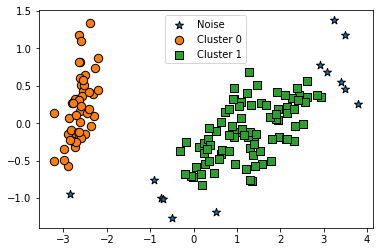

In [5]:
from sklearn.decomposition import PCA

# 2차원으로 시각화하기 위해 피처 데이터 세트 변환
pca = PCA(n_components=2, random_state=0)
pca_transformed = pca.fit_transform(iris.data)

iris_df['ftr1'] = pca_transformed[:,0]
iris_df['ftr2'] = pca_transformed[:,1]

visualize_cluster_plot(dbscan, iris_df, 'dbscan_cluster', iscenter=False)

일반적으로 eps의 값을 크게 하면 반경이 커져 노이즈 데이터의 개수가 작아지고,

min_samples를 크게 하면 주어진 반경 내에서 더 많은 데이터를 포함시켜야 하므로 노이즈 데이터의 개수가 커짐

### 1.5.2 DBSCAN 적용하기 - make_circles() 데이터 세트

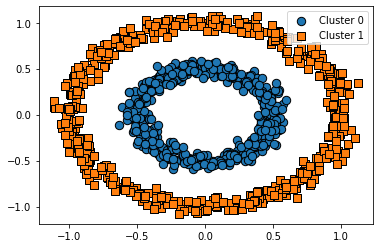

In [6]:
from sklearn.datasets import make_circles

# make_circles() 함수로 2차원 데이터 세트 생성
X, y = make_circles(n_samples=1000, shuffle=True, noise=0.05, random_state=0, factor=0.5)
cluster_df = pd.DataFrame(data=X, columns=['ftr1','ftr2'])
cluster_df['target'] = y

dbscan = DBSCAN(eps=0.2, min_samples=10, metric='euclidean')
dbscan_labels = dbscan.fit_predict(X)
cluster_df['dbscan_cluster'] = dbscan_labels

visualize_cluster_plot(dbscan, cluster_df, 'dbscan_cluster', iscenter=False)

내부와 외부의 원형으로 구성된 복잡한 형태의 데이터 세트를 정확히 군집화함

## 1.6 군집화 실습 - 고객 세그먼테이션

- 고객 세그먼테이션 : 다양한 기준으로 고객을 분류하는 기법 (CRM, 마케팅의 중요 기반 요소)

http://archive.ics.uci.edu/ml/datasets/online+retail 에서 데이터를 다운받아 RFM 기법을 이용하여 고객 세그먼테이션을 군집화

cf) RFM : 가장 최근 상품 구입일에서 오늘까지의 기간(Recency), 상품 구매 횟수(Frequency), 총 구매 금액(Monetary value)

In [4]:
import pandas as pd
import datetime
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_excel(io='./data/Online Retail.xlsx')
df.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom


- InvoiceNo: 주문번호 (C로 시작하는 것은 취소 주문)


- StockCode: 제품 코드


- Description: 제품 설명


- Quantitiy: 주문 제품 건수


- InvoiceDate: 주문 일자


- UnitPrice: 제품 단가


- CustomerID: 고객 번호


- Country: 국적

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


결측치가 많은 CustomerID와 Quantity 또는 UnitPrice가 0보다 적은 경우의 데이터 삭제

In [6]:
df = df[df['Quantity'] > 0]
df = df[df['UnitPrice'] > 0]
df = df[df['CustomerID'].notnull()]
print(df.shape)
df.isnull().sum()

(397884, 8)


InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [7]:
df['Country'].value_counts()[:5]

United Kingdom    354321
Germany             9040
France              8341
EIRE                7236
Spain               2484
Name: Country, dtype: int64

영국이 대다수를 차지하므로 다른 국가의 데이터는 모두 제외

In [8]:
df = df[df['Country'] == 'United Kingdom']
print(df.shape)

(354321, 8)


### 1.6.1 RFM 기반 데이터 가공

In [9]:
# 주문 금액 데이터 생성 및 CustomerID 타입 변경
df['sale_amount'] = df['Quantity'] * df['UnitPrice']
df['CustomerID'] = df['CustomerID'].astype(int)

In [10]:
# Top-5 주문 건수와 주문 금액을 가진 고객 데이터 추출
print(df['CustomerID'].value_counts().head())
print(df.groupby('CustomerID')['sale_amount'].sum().sort_values(ascending=False)[:5])

17841    7847
14096    5111
12748    4595
14606    2700
15311    2379
Name: CustomerID, dtype: int64
CustomerID
18102    259657.30
17450    194550.79
16446    168472.50
17511     91062.38
16029     81024.84
Name: sale_amount, dtype: float64


몇몇 특정 고객이 많은 주문 건수와 주문 금액을 가지고 있음

해당 데이터는 전형적인 판매 데이터 세트와 같이 주문번호(InvoiceNo) + 상품코드(StockCode) 레벨의 식별자로 구성

이에 따라 주문번호 기준의 데이터를 개별 고객 기준의 데이터로 Group by 하여 주문번호+상품코드 기준의 데이터를 고객 기준 RFM 데이터로 변경

In [11]:
# Recency는 InvoiceDate 칼럼의 max()에서 데이터 가공
# Frequency는 InvoiceNo 칼럼의 count(), Monetary value는 sale_amount 칼럼의 sum()
aggregations = {
    'InvoiceDate': 'max',
    'InvoiceNo': 'count',
    'sale_amount': 'sum'
}
cust_df = df.groupby('CustomerID').agg(aggregations)

# groupby된 결과 칼럼 값을 RFM으로 변경
cust_df = cust_df.rename(columns = {'InvoiceDate':'Recency',
                                    'InvoiceNo':'Frequency',
                                    'sale_amount':'Monetary'})
cust_df = cust_df.reset_index()
cust_df.head(3)

,CustomerID,Recency,Frequency,Monetary
0,12346,2011-01-18 10:01:00,1,77183.60
1,12747,2011-12-07 14:34:00,103,4196.01
2,12748,2011-12-09 12:20:00,4595,33719.73


온라인 판매 데이터는 2010면 12월 1일에서 2011년 12월 9일까지의 데이터임

2011년 12월 10일을 현재 날짜로 간주하고 가장 최근의 주문 일자를 뺀 데이터에서 일자 데이터(days)만 추출

In [12]:
import datetime as dt

cust_df['Recency'] = dt.datetime(2011, 12, 10) - cust_df['Recency']
cust_df['Recency'] = cust_df['Recency'].apply(lambda x: x.days+1)
print(cust_df.shape)
cust_df.head(3)

(3920, 4)


,CustomerID,Recency,Frequency,Monetary
0,12346,326,1,77183.60
1,12747,3,103,4196.01
2,12748,1,4595,33719.73


### 1.6.2  RFM 기반 고객 세그먼테이션

소매업체의 대규모 주문을 포함하므로, 이는 개인 고객 주문과 매우 큰 차이를 나타내 왜곡된 데이터 분포도를 가지게 됨

따라서 **StandardScaler로 평균과 표준편차를 재조정한 뒤에 K-평균 수행**

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

X_features = cust_df[['Recency','Frequency','Monetary']].values
X_features_scaled = StandardScaler().fit_transform(X_features)

kmeans = KMeans(n_clusters=3, random_state=0)
labels = kmeans.fit_predict(X_features_scaled)
cust_df['cluster_label'] = labels

print('실루엣 스코어: {0:.3f}'.format(silhouette_score(X_features_scaled, labels)))

실루엣 스코어: 0.592


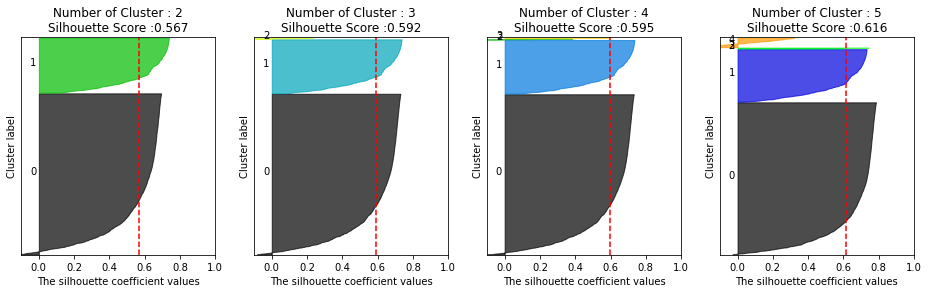

In [16]:
visualize_silhouette([2,3,4,5], X_features_scaled)

군집을 3개로 구성할 경우 실루엣 스코어는 안정적인 수치가 나왔으나, 데이터 세트의 개수가 너무 작은 군집이 생성됨

이 소수의 데이터 세트는 왜곡된 데이터 값인 특정 소매점의 대량 주문 구매 데이터를 의미함

따라서 왜곡 정도를 낮추기 위해 **전체 데이터를 로그 변환한 뒤에 K-평균 알고리즘 적용**

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

cust_df['Recency_log'] = np.log1p(cust_df['Recency'])
cust_df['Frequency_log'] = np.log1p(cust_df['Frequency'])
cust_df['Monetary_log'] = np.log1p(cust_df['Monetary'])

X_features = cust_df[['Recency_log', 'Frequency_log', 'Monetary_log']].values
X_features_scaled = StandardScaler().fit_transform(X_features)

kmeans = KMeans(n_clusters=3, random_state=0)
labels = kmeans.fit_predict(X_features_scaled)
cust_df['cluster_label'] = labels

print('실루엣 스코어: {0:.3f}'.format(silhouette_score(X_features_scaled, labels)))

실루엣 스코어: 0.303


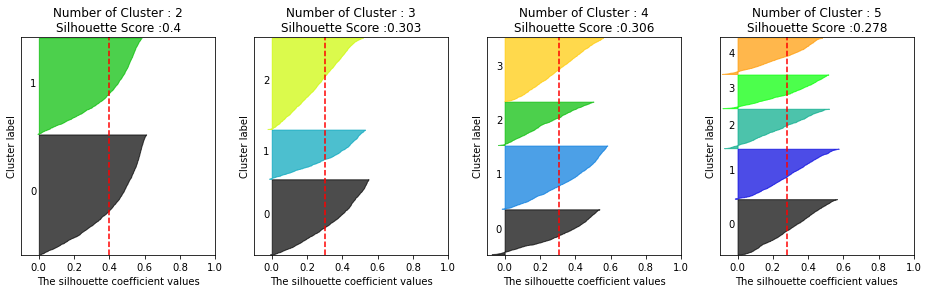

In [20]:
visualize_silhouette([2,3,4,5], X_features_scaled)

실루엣 스코어는 전보다 더 떨어졌으나, 앞의 경우보다 균일하게 군집화가 구성됐음을 알 수 있음